Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

**Using Support Vector Regressor on Credit Dataset**

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-Credit.csv")
df.head(5)


,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [2]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance'],
      dtype='object')

In [3]:
len(df) #Total Instances/Samples

400

In [4]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


There is no missing value in this dataset

**Handling categorical values or encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
df['Own'] = le.fit_transform(df['Own'])
df['Student'] = le.fit_transform(df['Student'])
df['Married'] = le.fit_transform(df['Married'])
df['Region'] = le.fit_transform(df['Region'])


In [8]:
df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,1,333
1,106.025,6645,483,3,82,15,1,1,1,2,903
2,104.593,7075,514,4,71,11,0,0,0,2,580
3,148.924,9504,681,3,36,11,1,0,0,2,964
4,55.882,4897,357,2,68,16,0,0,1,1,331
5,80.180,8047,569,4,77,10,0,0,0,1,1151
6,20.996,3388,259,2,37,12,1,0,0,0,203
7,71.408,7114,512,2,87,9,0,0,0,2,872
8,15.125,3300,266,5,66,13,1,0,0,1,279
9,71.061,6819,491,3,41,19,1,1,1,0,1350


In [9]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance


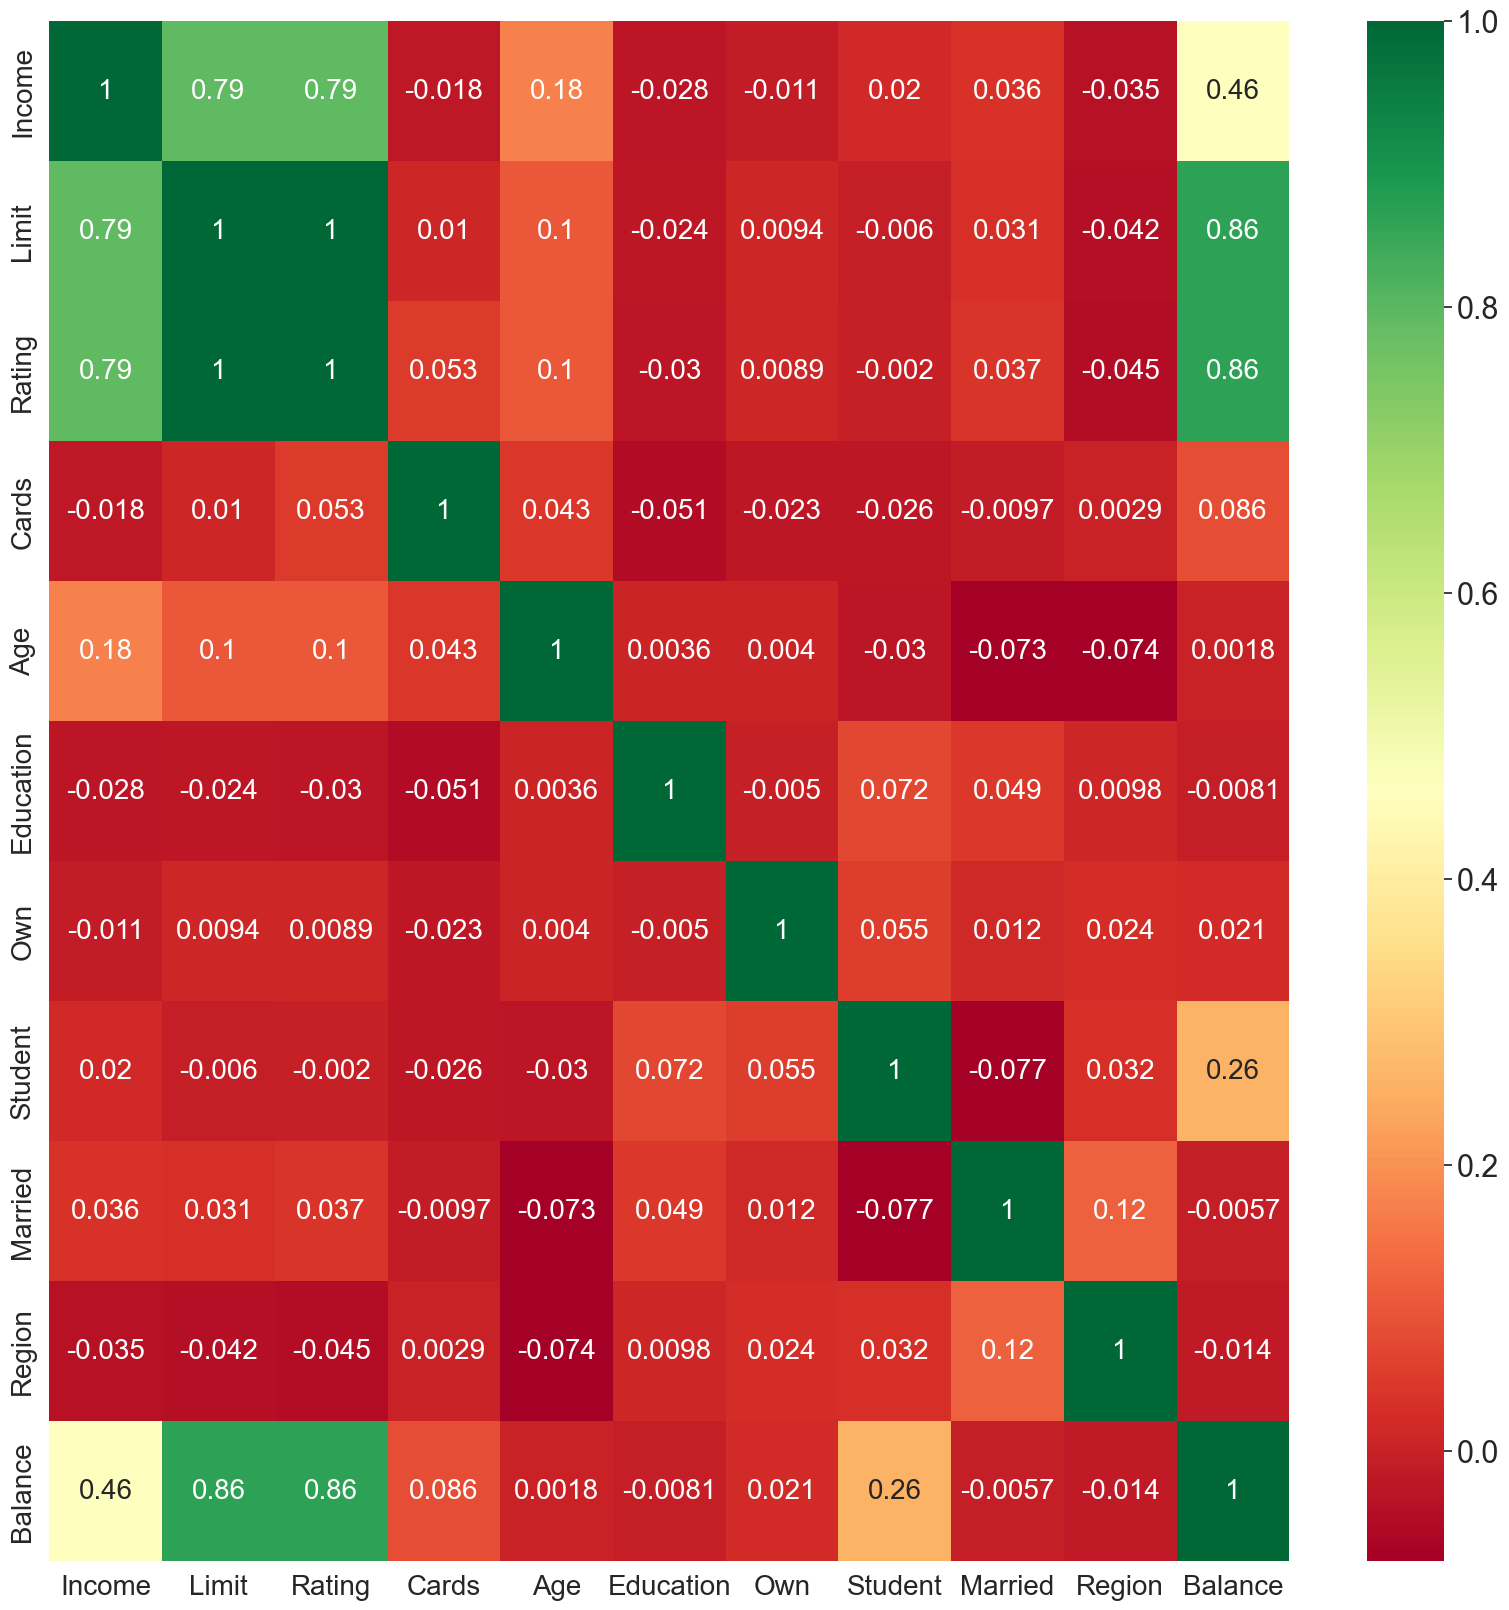

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

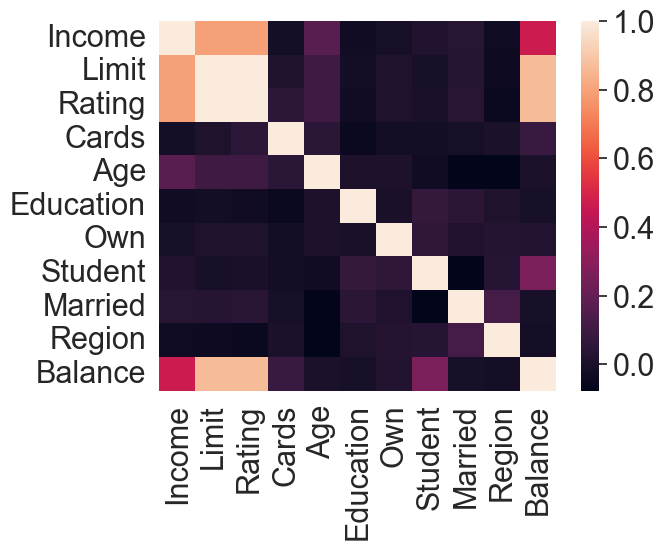

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop(columns=['Balance'])
y = df['Balance']


In [13]:
X

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region
0,14.891,3606,283,2,34,11,0,0,1,1
1,106.025,6645,483,3,82,15,1,1,1,2
2,104.593,7075,514,4,71,11,0,0,0,2
3,148.924,9504,681,3,36,11,1,0,0,2
4,55.882,4897,357,2,68,16,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,1
396,13.364,3838,296,5,65,17,0,0,0,0
397,57.872,4171,321,5,67,12,1,0,1,1
398,37.728,2525,192,1,44,13,0,0,1,1


In [14]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [15]:
total_samples = len(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Testing Size: ", len(X_test))

Total Samples:  400
Training Size:  320
Testing Size:  80


In [16]:
len(y_train)

320

# Feature Engineering

In [17]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [18]:
X_test

array([[ 3.05597973e+00,  2.29876420e+00,  2.22617813e+00,
        -8.11906907e-01,  2.16368777e+00, -7.50848869e-01,
         9.04534034e-01, -3.77964473e-01,  7.33799386e-01,
        -1.48906116e+00],
       [ 2.34738647e-01,  2.82595911e-01,  1.55314754e-01,
        -3.86622337e-02, -9.49132142e-01, -4.09553929e-01,
         9.04534034e-01, -3.77964473e-01, -1.36277029e+00,
        -1.48906116e+00],
       [-3.96065507e-01, -1.55123973e+00, -1.52481969e+00,
         7.34582439e-01, -1.22706249e+00, -1.09214381e+00,
        -1.10554160e+00, -3.77964473e-01,  7.33799386e-01,
        -1.83834711e-02],
       [-5.91427563e-01, -8.27689104e-01, -8.91838805e-01,
        -8.11906907e-01,  5.51691743e-01, -4.09553929e-01,
         9.04534034e-01, -3.77964473e-01,  7.33799386e-01,
        -1.83834711e-02],
       [-8.22289172e-01,  3.43548614e-01,  2.41275120e-01,
        -8.11906907e-01, -1.44940677e+00,  9.55625834e-01,
        -1.10554160e+00, -3.77964473e-01, -1.36277029e+00,
        -1.

In [19]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

model = svm.SVR(C=600, epsilon=0.2)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
print("Mean Squared Error in training: ", MSE_train)
print("Mean Squared Error in testing: ", MSE_test)

Mean Squared Error in training:  1755.65535513855
Mean Squared Error in testing:  14878.193268029907


**Using Support Vector Regressor on Wage Dataset**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-Wage.csv")
df.head(5)


,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [2]:
df.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [3]:
len(df) #Total Instances/Samples

3000

In [4]:
df.isnull().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


**Handling categorical values or encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
df['maritl'] = le.fit_transform(df['maritl'])
df['race'] = le.fit_transform(df['race'])
df['education'] = le.fit_transform(df['education'])
df['region'] = le.fit_transform(df['region'])
df['jobclass'] = le.fit_transform(df['jobclass'])
df['health'] = le.fit_transform(df['health'])
df['health_ins'] = le.fit_transform(df['health_ins'])


In [8]:
df.head(10)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,0,0,0,0,0,0,1,4.318063,75.043154
1,2004,24,0,0,3,0,1,1,1,4.255273,70.476020
2,2003,45,1,0,2,0,0,0,0,4.875061,130.982177
3,2003,43,1,2,3,0,1,1,0,5.041393,154.685293
4,2005,50,3,0,1,0,1,0,0,4.318063,75.043154
5,2008,54,1,0,3,0,1,1,0,4.845098,127.115744
6,2009,44,1,3,2,0,0,1,0,5.133021,169.528538
7,2008,30,0,2,2,0,1,0,0,4.716003,111.720849
8,2006,41,0,1,2,0,1,1,0,4.778151,118.884359
9,2004,52,1,0,1,0,1,1,0,4.857332,128.680488


In [9]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
1956,2004,38,1,0,4,0,1,1,0,5.000000,148.413159
2286,2007,46,1,0,4,0,1,1,0,5.641006,281.745971
2733,2003,50,1,0,4,0,1,1,0,4.903090,134.705375


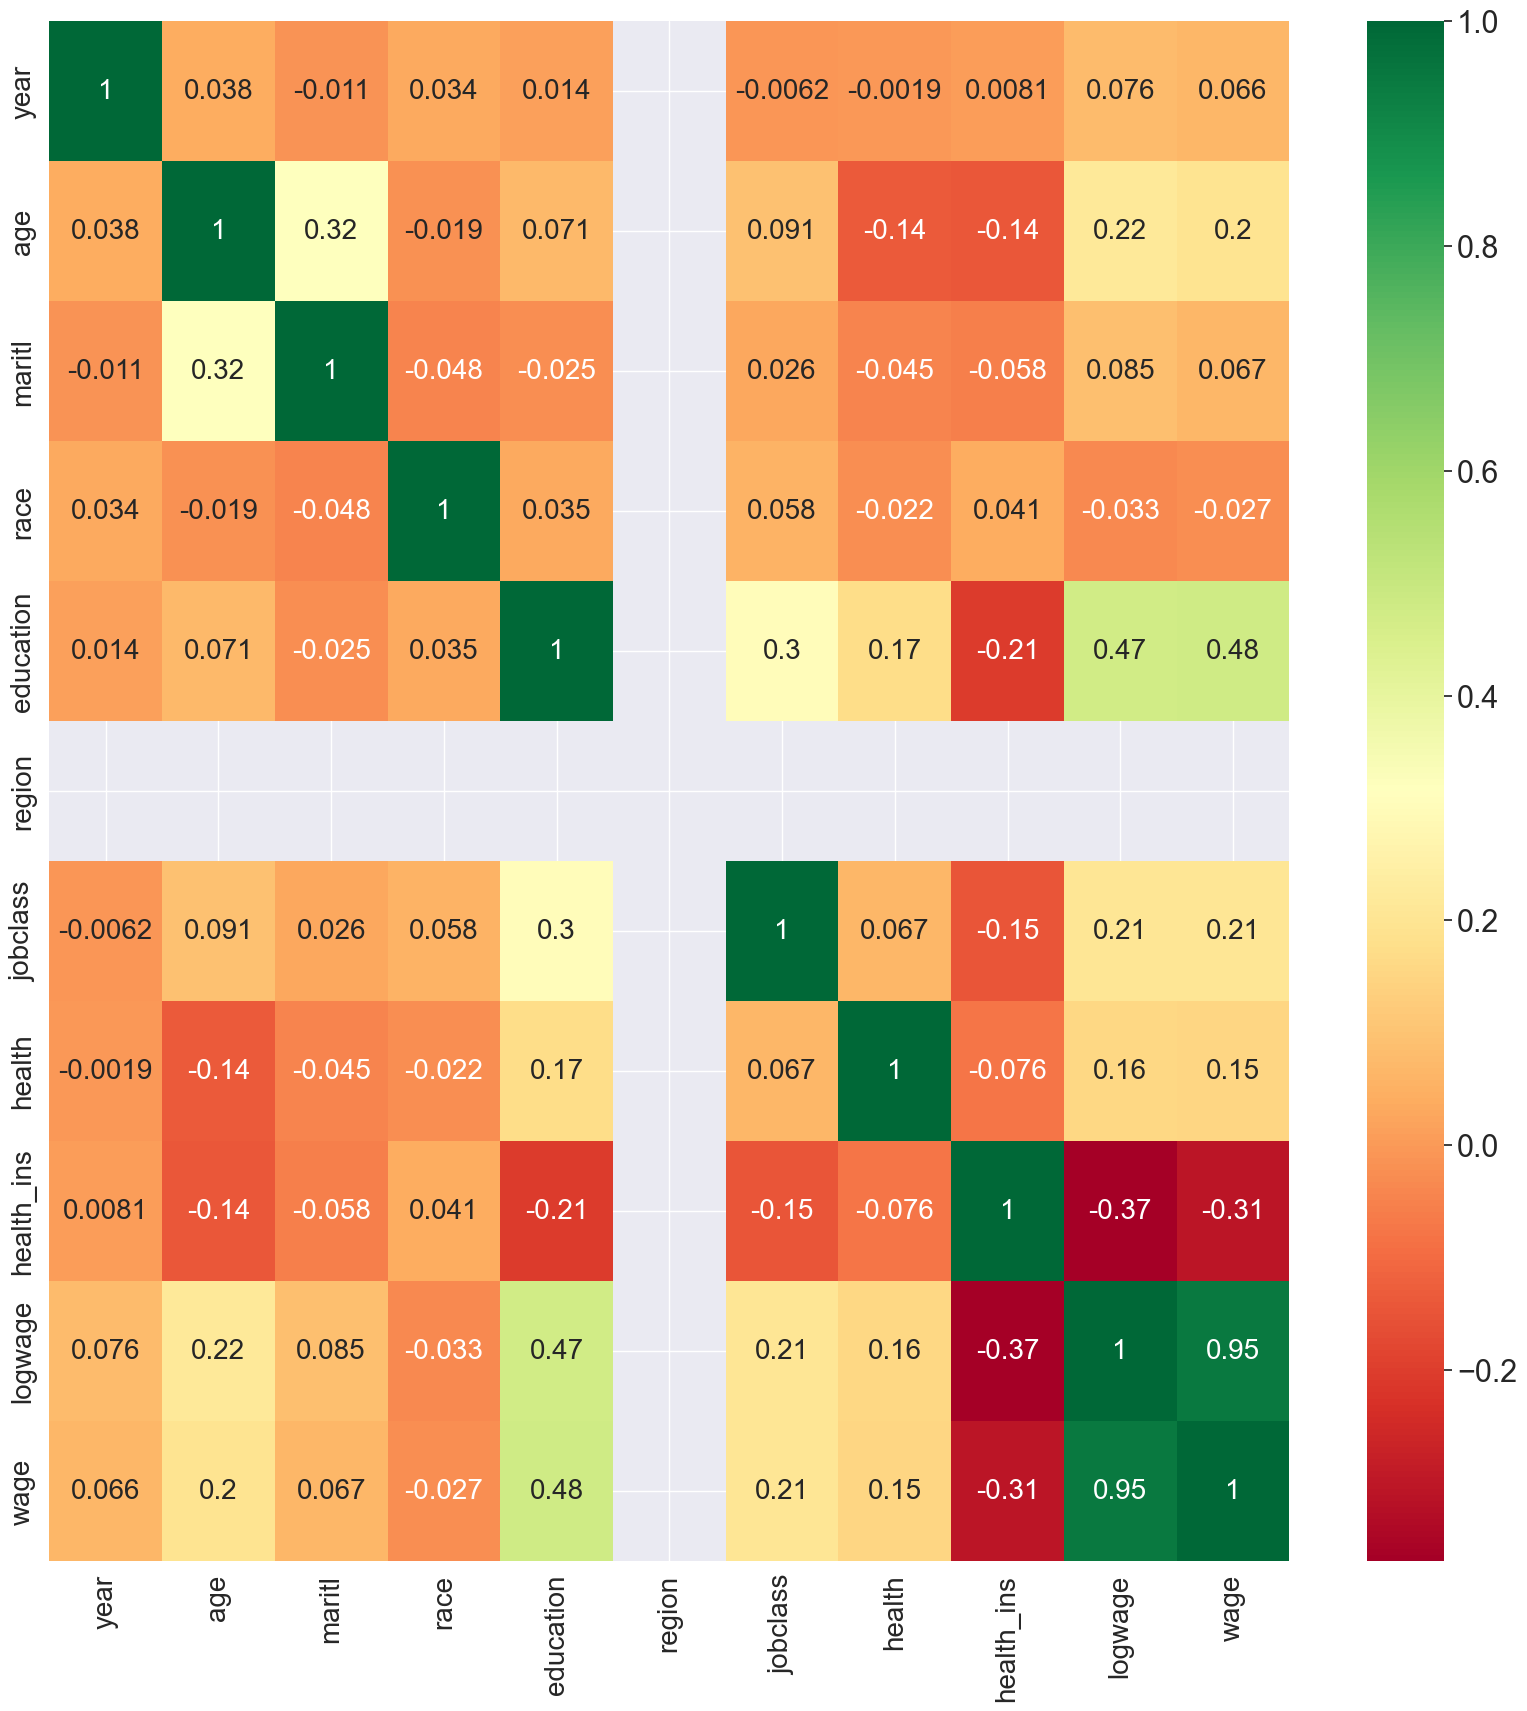

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

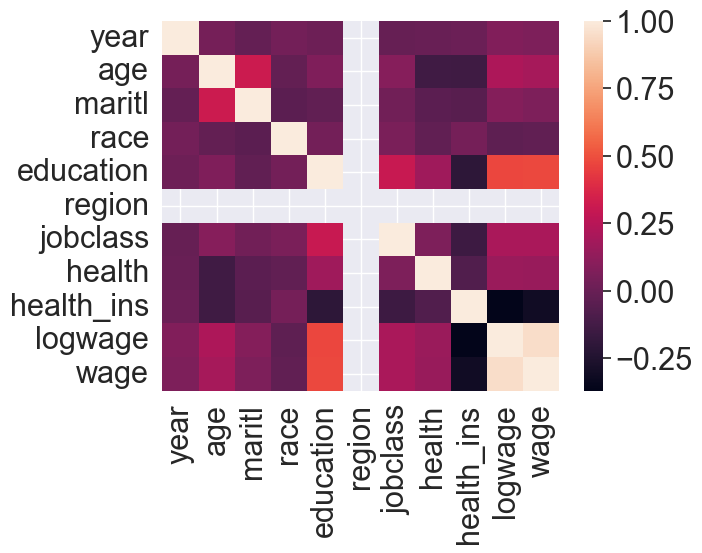

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop(columns=['wage', 'region'])
y = df['wage']

In [13]:
X

,year,age,maritl,race,education,jobclass,health,health_ins,logwage
0,2006,18,0,0,0,0,0,1,4.318063
1,2004,24,0,0,3,1,1,1,4.255273
2,2003,45,1,0,2,0,0,0,4.875061
3,2003,43,1,2,3,1,1,0,5.041393
4,2005,50,3,0,1,1,0,0,4.318063
...,...,...,...,...,...,...,...,...,...
2995,2008,44,1,0,2,0,1,0,5.041393
2996,2007,30,1,0,1,0,1,1,4.602060
2997,2005,27,1,1,0,0,0,1,4.193125
2998,2005,27,0,0,2,0,1,0,4.477121


In [14]:
y

0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64

In [15]:
total_samples = len(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Testing Size: ", len(X_test))

Total Samples:  3000
Training Size:  2400
Testing Size:  600


In [17]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [18]:
X_test

array([[-1.41437215,  0.26977227,  0.03695265, ..., -1.59696458,
         1.45217364, -0.44572273],
       [-1.41437215, -1.54116573,  0.03695265, ...,  0.62618797,
        -0.68862288, -0.82252449],
       [-1.41437215, -0.59257916,  0.03695265, ...,  0.62618797,
        -0.68862288,  0.13881756],
       ...,
       [ 1.52034816, -2.14481173, -1.19480238, ..., -1.59696458,
         1.45217364, -2.26147075],
       [-1.41437215,  0.78718313,  0.03695265, ...,  0.62618797,
         1.45217364, -1.1285098 ],
       [-0.43613205, -1.71363602, -1.19480238, ...,  0.62618797,
         1.45217364, -1.9692006 ]])

In [29]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

model = svm.SVR(C=400, epsilon=0.2)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
print("Mean Squared Error in training: ", MSE_train)
print("Mean Squared Error in testing: ", MSE_test)


Mean Squared Error in training:  0.06918421662060578
Mean Squared Error in testing:  12.767295543040381
